In [2]:

import numpy as np
from matplotlib import pyplot as plt

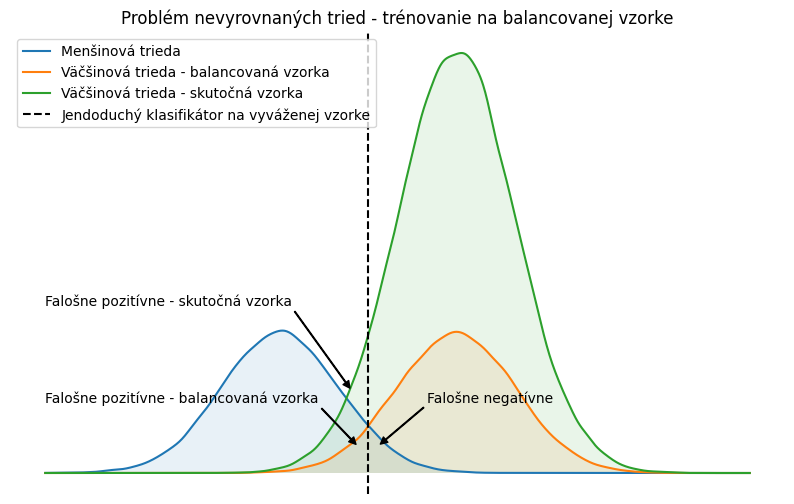

In [58]:


# Creating KDE plot with counts on y-axis
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate data
np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1, size=25000)
group2 = np.random.normal(loc=3, scale=1, size=25000)
group3 = np.random.normal(loc=3, scale=1, size=75000)



# Create density estimates
density1 = gaussian_kde(group1)
density2 = gaussian_kde(group2)
density3 = gaussian_kde(group3)

# Define range for the plots
x = np.linspace(-4, 8, 1000)

density1_values = density1(x) * len(group1)
density2_values = density2(x) * len(group2)
density3_values = density3(x) * len(group3)

mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
vertical_line_position = (mean_group1 + mean_group2) / 2




# Plot density
plt.figure(figsize=(10, 6))
plt.plot(x, density1_values, label='Menšinová trieda')
plt.fill_between(x, density1_values, alpha=0.1)
plt.plot(x, density2_values, label='Väčšinová trieda - balancovaná vzorka')
plt.fill_between(x, density2_values, alpha=0.1)
plt.plot(x, density3_values, label='Väčšinová trieda - skutočná vzorka')
plt.fill_between(x, density3_values, alpha=0.1)

plt.axvline(vertical_line_position, color='black', linestyle='--', label='Jendoduchý klasifikátor na vyváženej vzorke')


# Add arrows for misclassified segments
plt.annotate('Falošne pozitívne - balancovaná vzorka',
                xy=(vertical_line_position - 0.2, max(density2_values) * 0.2),
                xytext=(vertical_line_position - 5.5, max(density2_values) * 0.5),
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5, headlength=5),
                )
plt.annotate('Falošne negatívne', xy=(vertical_line_position + 0.2, max(density1_values) * 0.2),
             xytext=(vertical_line_position + 1, max(density1_values) * 0.5),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5, headlength=5),
            )

plt.annotate('Falošne pozitívne - skutočná vzorka',
                xy=(vertical_line_position - 0.3, max(density3_values) * 0.2),
                xytext=(vertical_line_position - 5.5, max(density3_values) * 0.4),
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5, headlength=5),
                )

plt.title('Problém nevyrovnaných tried - trénovanie na balancovanej vzorke')
# plt.xlabel('Value')
# plt.ylabel('Counts')

plt.xticks([])  # Remove x-axis labels
plt.yticks([])  # Remove y-axis labels
plt.xlabel('')  # Remove x-axis title
plt.ylabel('')  # Remove y-axis title

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.legend()

plt.show()


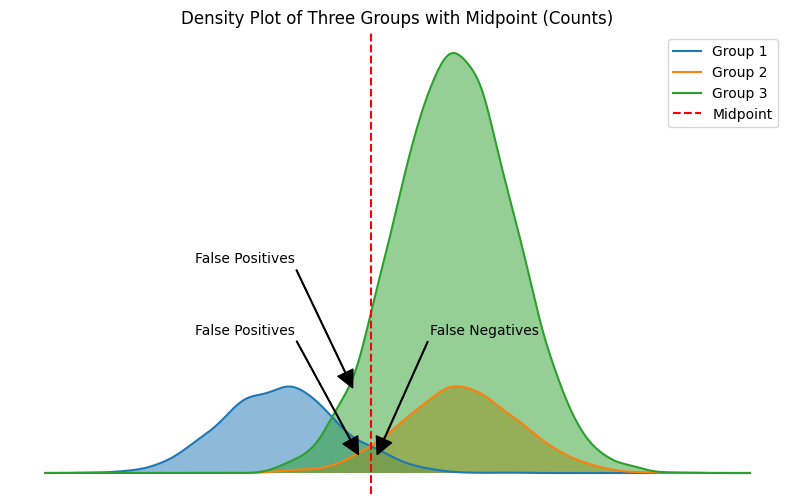

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate data
np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1, size=1000)
group2 = np.random.normal(loc=3, scale=1, size=1000)
group3 = np.random.normal(loc=3, scale=1, size=5000)

# Create density estimates
density1 = gaussian_kde(group1)
density2 = gaussian_kde(group2)
density3 = gaussian_kde(group3)

# Define range for the plots
x = np.linspace(-4, 8, 1000)

# Calculate densities
density1_values = density1(x) * len(group1)
density2_values = density2(x) * len(group2)
density3_values = density3(x) * len(group3)

# Calculate the position of the vertical line
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)
vertical_line_position = (mean_group1 + mean_group2) / 2

# Plot density with vertical line, without labels, values, and frame
plt.figure(figsize=(10, 6))
plt.plot(x, density1_values, label='Group 1')
plt.fill_between(x, density1_values, alpha=0.5)
plt.plot(x, density2_values, label='Group 2')
plt.fill_between(x, density2_values, alpha=0.5)
plt.plot(x, density3_values, label='Group 3')
plt.fill_between(x, density3_values, alpha=0.5)
plt.axvline(vertical_line_position, color='red', linestyle='--', label='Midpoint')
plt.title('Density Plot of Three Groups with Midpoint (Counts)')
plt.legend()

# Add arrows for misclassified segments
plt.annotate('False Positives',
                xy=(vertical_line_position - 0.2, max(density2_values) * 0.2),
                xytext=(vertical_line_position - 3, max(density2_values) * 1.6),
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5))
plt.annotate('False Negatives', xy=(vertical_line_position + 0.1, max(density1_values) * 0.2),
             xytext=(vertical_line_position + 1, max(density1_values) * 1.6),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.5))

plt.annotate('False Positives',
                xy=(vertical_line_position - 0.3, max(density3_values) * 0.2),
                xytext=(vertical_line_position - 3, max(density3_values) * 0.5),
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5))

plt.xticks([])  # Remove x-axis labels
plt.yticks([])  # Remove y-axis labels
plt.xlabel('')  # Remove x-axis title
plt.ylabel('')  # Remove y-axis title
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()
